# Data Loading
Nothing much here. Just importing the repo and putting into X and Y.

In [1]:
import numpy as np
  
data = np.load('data.npz')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

# SKLearn Imports and Data Preprocessing
Importing necessary SKLearn packages and preprocessing the data. (80/20 train test split)

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

metrics = {}

# Default Decision Tree Classifier
When reading a paper on Bankruptcy Prediction, Random Forest and XGBoost were used. Upon the creation of this ipynb, Decision Trees, Random Forest, and XGBoost were all tested and the default XGBoost and Decision Tree returned simliar scores, so the Decision Tree algorithm was chosen as the first path of exploration with hopes of being able to have more optimization with different hyperparameters and custom ensembling in the DT algorithm. These were the scores of each default algorithm:
- Scaled:
    - Decision Tree:
        - Accuracy: 0.9589
        - Precision: 0.3860
        - Recall: 0.5116
        - F1: 0.4400
    - Random Forest:
        - Accuracy: 0.9692
        - Precision: 0.5294
        - Recall: 0.2093
        - F1: 0.3000
    - XGBoost:
        - Accuracy: 0.9721
        - Precision: 0.6087
        - Recall: 0.3256
        - F1: 0.4242
- Not Scaled:
    - Decision Tree:
        - Accuracy: 0.9494
        - Precision: 0.2759
        - Recall: 0.3721
        - F1: 0.3168
    - Random Forest:
        - Accuracy: 0.9699
        - Precision: 0.5625
        - Recall: 0.2093
        - F1: 0.3051
    - XGBoost:
        - Accuracy: 0.9736
        - Precision: 0.7059
        - Recall: 0.2791
        - F1: 0.4000

In [3]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()

dt_model = DecisionTreeClassifier(random_state=69)

dt_model.fit(X_train_scaled, y_train)

dt_y_pred = dt_model.predict(X_test_scaled)

dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)
dt_f1 = f1_score(y_test, dt_y_pred)

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Decision Tree Precision: {dt_precision:.4f}")
print(f"Decision Tree Recall: {dt_recall:.4f}")
print(f"Decision Tree F1 Score: {dt_f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, dt_y_pred))

metrics['Default DT'] = [dt_accuracy, dt_precision, dt_recall, dt_f1]

Decision Tree Accuracy: 0.9589
Decision Tree Precision: 0.3860
Decision Tree Recall: 0.5116
Decision Tree F1 Score: 0.4400

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1321
           1       0.39      0.51      0.44        43

    accuracy                           0.96      1364
   macro avg       0.68      0.74      0.71      1364
weighted avg       0.97      0.96      0.96      1364



In [4]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=69)

rf_model.fit(X_train, y_train)

rf_y_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Random Forest Precision: {rf_precision:.4f}")
print(f"Random Forest Recall: {rf_recall:.4f}")
print(f"Random Forest F1 Score: {rf_f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, rf_y_pred))

metrics['Random Forest'] = [rf_accuracy, rf_precision, rf_recall, rf_f1]

Random Forest Accuracy: 0.9714
Random Forest Precision: 0.6250
Random Forest Recall: 0.2326
Random Forest F1 Score: 0.3390

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1321
           1       0.62      0.23      0.34        43

    accuracy                           0.97      1364
   macro avg       0.80      0.61      0.66      1364
weighted avg       0.96      0.97      0.97      1364



In [5]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=69)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)
xgb_f1 = f1_score(y_test, xgb_y_pred)

print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"XGBoost Precision: {xgb_precision:.4f}")
print(f"XGBoost Recall: {xgb_recall:.4f}")
print(f"XGBoost F1 Score: {xgb_f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, xgb_y_pred))

metrics['XGBoost'] = [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]

XGBoost Accuracy: 0.9736
XGBoost Precision: 0.7059
XGBoost Recall: 0.2791
XGBoost F1 Score: 0.4000

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1321
           1       0.71      0.28      0.40        43

    accuracy                           0.97      1364
   macro avg       0.84      0.64      0.69      1364
weighted avg       0.97      0.97      0.97      1364



# Grid Search
This will get the best overall model for the parameters max_depth, min_samples_split, min_samples_leaf, and criterion. (72 models in total)

## Best Hyperparameters Based on Testing with Cross-Validation (cv=5)
- Criterion='gini'
- max_depth=None
- min_samples_leaf=5
- min_samples_split=5

In [6]:
# param_grid = {
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 10, 20],
#     'min_samples_leaf': [1, 5, 10],
#     'criterion': ['gini', 'entropy']
# }

# grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='f1', verbose=1)

# best_model = grid_search.fit(X_train, y_train)

# dt_y_pred = best_model.predict(X_test)

# dt_accuracy = accuracy_score(y_test, dt_y_pred)
# dt_precision = precision_score(y_test, dt_y_pred)
# dt_recall = recall_score(y_test, dt_y_pred)
# dt_f1 = f1_score(y_test, dt_y_pred)

# print(f"Best Decision Tree Parameters: {best_model.best_params_}")
# print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
# print(f"Decision Tree Precision: {dt_precision:.4f}")
# print(f"Decision Tree Recall: {dt_recall:.4f}")
# print(f"Decision Tree F1 Score: {dt_f1:.4f}")

# Further Testing
After further testing, these hyperparameters are the best for the Decision Tree. (min_samples_split=3 is the only parameter different from default)

In [7]:
dt_model = DecisionTreeClassifier(random_state=69, max_depth=None, criterion='gini', min_samples_split=3, min_samples_leaf=1)

dt_model.fit(X_train_scaled, y_train)

dt_y_pred = dt_model.predict(X_test_scaled)

dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)
dt_f1 = f1_score(y_test, dt_y_pred)

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Decision Tree Precision: {dt_precision:.4f}")
print(f"Decision Tree Recall: {dt_recall:.4f}")
print(f"Decision Tree F1 Score: {dt_f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, dt_y_pred))

metrics['Optimal DT'] = [dt_accuracy, dt_precision, dt_recall, dt_f1]

Decision Tree Accuracy: 0.9597
Decision Tree Precision: 0.3966
Decision Tree Recall: 0.5349
Decision Tree F1 Score: 0.4554

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1321
           1       0.40      0.53      0.46        43

    accuracy                           0.96      1364
   macro avg       0.69      0.75      0.72      1364
weighted avg       0.97      0.96      0.96      1364



# Grid Search
This will get the best overall model for the parameters max_depth, min_child_weight, gamma, subsample, and colsample_bytree. (405 models in total)

## Best Hyperparameters Based on Testing with Cross-Validation (cv=5)
- ROC_AUC (F1 score of 0.44)
    - max_depth=None
    - min_child_weight=3
    - gamma=0.1
    - subsample=0.8
    - colsample_bytree=0.9
- F1 (Somehow the F1 score was lower than the model for ROC_AUC) (0.4375)
    - max_depth=2
    - min_child_weight=3
    - gamma=0.0
    - subsample=0.7
    - colsample_bytree=0.9

In [8]:
# param_test = {
#     'max_depth': [None, 2, 3, 5, 10],
#     'min_child_weight': [1, 3, 5],
#     'gamma': [0.0, 0.1, 0.2],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9]
# }

# gsearch = GridSearchCV(estimator=xgb.XGBClassifier(learning_rate=0.1, n_estimators=140, objective='binary:logistic',
#                                                     silent=True, nthread=1),
#                        param_grid=param_test, scoring='f1', n_jobs=4, cv=5)

# best_model = gsearch.fit(X_train, y_train)

# xg_y_pred = best_model.predict(X_test)

# xg_accuracy = accuracy_score(y_test, xg_y_pred)
# xg_precision = precision_score(y_test, xg_y_pred)
# xg_recall = recall_score(y_test, xg_y_pred)
# xg_f1 = f1_score(y_test, xg_y_pred)

# print(f"Best Decision Tree Parameters: {best_model.best_params_}")
# print(f"XGB Accuracy: {xg_accuracy:.4f}")
# print(f"XGB Precision: {xg_precision:.4f}")
# print(f"XGB Recall: {xg_recall:.4f}")
# print(f"XGB F1 Score: {xg_f1:.4f}")

# Visualization of Metrics Comparison

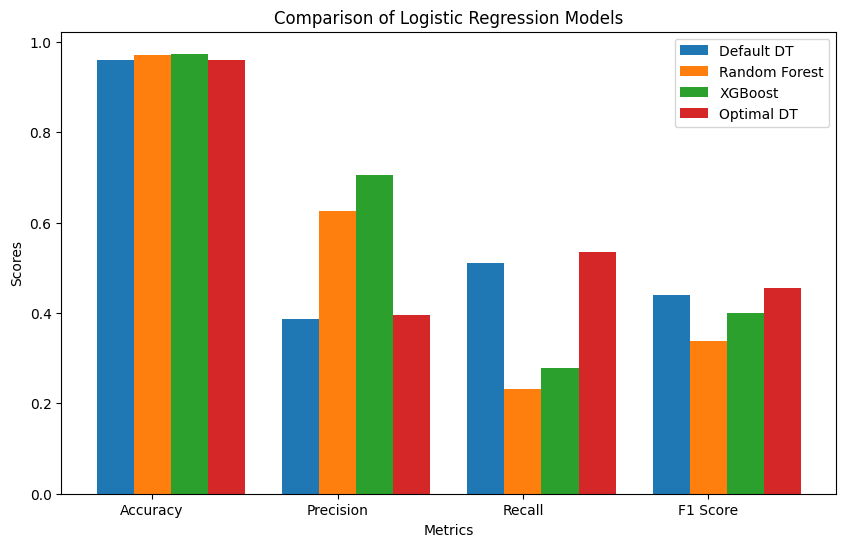

In [9]:
model_names = list(metrics.keys())

metric_types = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

x = np.arange(len(metric_types))

fig, ax = plt.subplots(figsize=(10, 6))

width = 0.20
for i, model in enumerate(model_names):
    ax.bar(x + i * width, metrics[model], width, label=model)

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Logistic Regression Models')
ax.set_xticks(x + width)
ax.set_xticklabels(metric_types)
ax.legend()

plt.show()